In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'times.txt'
df = pd.read_csv(filename)


In [3]:
df[["totaltime", "seconds"]] = df["totaltime"].str.split(":", 1, expand=True)
df[["seconds", "mSeconds"]] = df["seconds"].str.split(".", 1, expand=True)
df["totaltime"] = df["totaltime"].astype(int) * 60 + df["seconds"].astype(int)

In [4]:
df["program"] = df["program"].str.strip("  ")

In [5]:
df[["program", "timeSteps"]] = df["program"].str.split(" ", 1, expand=True)
df[["timeSteps", "xSize"]] = df["timeSteps"].str.split(" ", 1, expand=True)
df[["xSize", "ySize"]] = df["xSize"].str.split(" ", 1, expand=True)
df[["ySize", "xCores"]] = df["ySize"].str.split(" ", 1, expand=True)
df[["xCores", "yCores"]] = df["xCores"].str.split(" ", 1, expand=True)

In [6]:

df['amountCores'] = df['xCores'].astype(int) * df['yCores'].astype(int)
df['program'] = df['program'] + df['timeSteps'] + df['amountCores'].astype(str)
df['timeSteps'] = df["timeSteps"].astype(int)
df['cpu'] = df['cpu'].str.strip("%").astype(int) / df['amountCores'].astype(int)

In [7]:
df2 = df.groupby('program').mean()

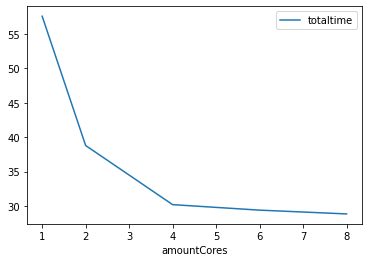

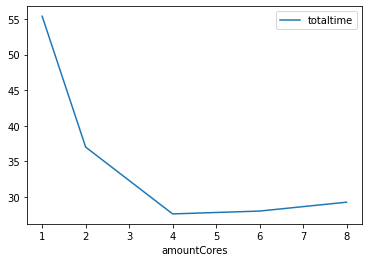

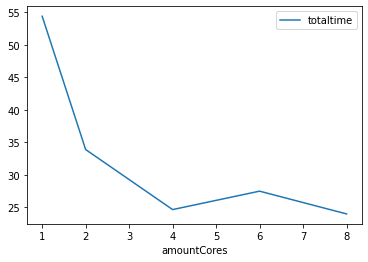

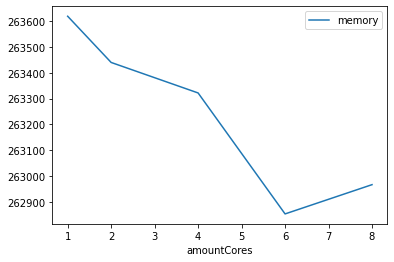

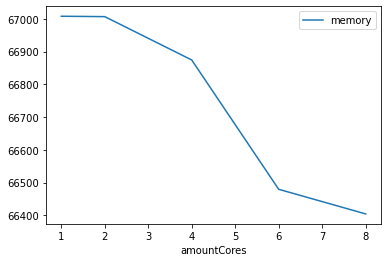

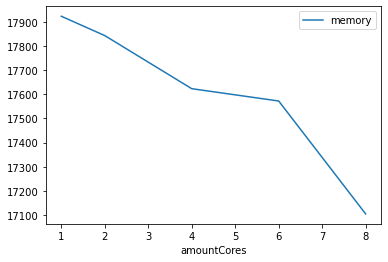

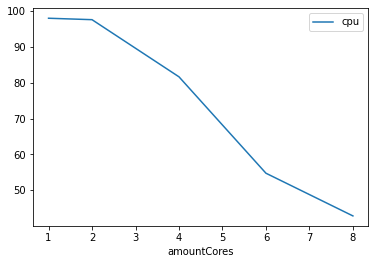

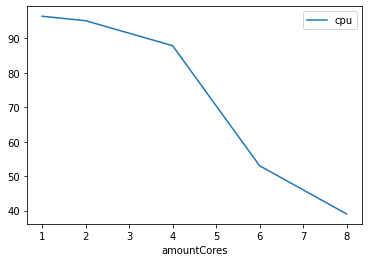

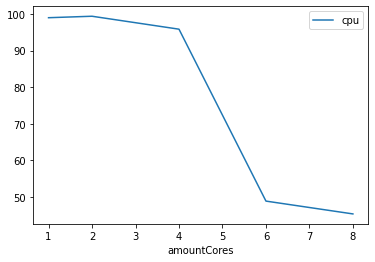

In [8]:
df2.groupby("timeSteps").plot(x="amountCores", y="totaltime")
df2.groupby("timeSteps").plot(x="amountCores", y="memory")
df2.groupby("timeSteps").plot(x="amountCores", y="cpu")
plt.show()